In [2]:
#https://github.com/QuantBloke/geron-handson-ml3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LinearRegression

In [3]:
datapath=Path("../data/lifesat")
oecd_bli=pd.read_csv(datapath/"oecd_bli.csv")

gdp_per_capita=pd.read_csv(datapath/"gdp_per_capita.csv")

In [4]:
display(oecd_bli)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.40,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.50,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.70,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.00,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,0.54,NaN,NaN
2365,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,32.09,NaN,NaN
2366,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,0.67,NaN,NaN
2367,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,19.37,NaN,NaN


In [5]:
display(gdp_per_capita)

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117
...,...,...,...,...
7104,Zimbabwe,ZWE,2016,3173.610829
7105,Zimbabwe,ZWE,2017,3274.611198
7106,Zimbabwe,ZWE,2018,3341.665418
7107,Zimbabwe,ZWE,2019,3027.656038


In [6]:
gdp_per_capita.columns

Index(['Entity', 'Code', 'Year',
       'GDP per capita, PPP (constant 2017 international $)'],
      dtype='object')

In [7]:
gdp_per_capita.columns
gdp_per_capita_2020=gdp_per_capita[gdp_per_capita["Year"]==2020]
gdp_per_capita_2020=gdp_per_capita_2020.rename(
    columns={"GDP per capita, PPP (constant 2017 international $)":"GDP per capita (USD)"}
)
gdp_per_capita_2020


,Entity,Code,Year,GDP per capita (USD)
18,Afghanistan,AFG,2020,1978.961579
49,Africa Eastern and Southern,NaN,2020,3387.594670
80,Africa Western and Central,NaN,2020,4003.158913
111,Albania,ALB,2020,13295.410885
142,Algeria,DZA,2020,10681.679297
...,...,...,...,...
6984,Vanuatu,VUT,2020,2762.791388
7015,Vietnam,VNM,2020,8200.331867
7046,World,OWID_WRL,2020,16194.040310
7077,Zambia,ZMB,2020,3270.035112


In [8]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3
Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,...,25879.0,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,...,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1
Czech Republic,20.0,0.7,94.0,5.65,74.0,72.3,0.5,21453.0,NaN,24.0,...,25372.0,91.0,1.4,60.0,1.6,491.0,NaN,61.0,87.0,17.9
Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,23.0,...,51466.0,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5


In [9]:
oecd_bli=oecd_bli.reset_index()
oecd_bli

Indicator,Country,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
0,Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
1,Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
2,Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
3,Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
4,Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3
5,Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,...,25879.0,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5
6,Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,...,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1
7,Czech Republic,20.0,0.7,94.0,5.65,74.0,72.3,0.5,21453.0,NaN,...,25372.0,91.0,1.4,60.0,1.6,491.0,NaN,61.0,87.0,17.9
8,Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,...,51466.0,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5
9,Estonia,8.0,7.0,89.0,2.42,74.0,69.0,3.1,19697.0,159373.0,...,24336.0,92.0,1.6,53.0,2.7,524.0,14.90,64.0,84.0,17.7


In [10]:
gdp_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 4 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               7109 non-null   object 
 1   Code                                                 5729 non-null   object 
 2   Year                                                 7109 non-null   int64  
 3   GDP per capita, PPP (constant 2017 international $)  7109 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 222.3+ KB


In [11]:
oecd_bli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 25 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country                                            41 non-null     object 
 1   Air pollution                                      41 non-null     float64
 2   Dwellings without basic facilities                 38 non-null     float64
 3   Educational attainment                             40 non-null     float64
 4   Employees working very long hours                  39 non-null     float64
 5   Employment rate                                    41 non-null     float64
 6   Feeling safe walking alone at night                41 non-null     float64
 7   Homicide rate                                      41 non-null     float64
 8   Household net adjusted disposable income           30 non-null     float64
 9   Household ne

In [12]:
full_country_stats=oecd_bli.merge(gdp_per_capita_2020,left_on="Country",right_on="Entity",how="inner")
#full_country_stats=full_country_stats.sort_values(by='GDP per capita (USD)')
full_country_stats


,Country,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,...,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Entity,Code,Year,GDP per capita (USD)
0,Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,...,2.7,502.0,14.35,91.0,93.0,21.0,Australia,AUS,2020,48697.837028
1,Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,...,1.3,492.0,14.55,80.0,92.0,17.0,Austria,AUT,2020,51935.603862
2,Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,...,2.0,503.0,15.70,89.0,84.0,19.3,Belgium,BEL,2020,48210.033111
3,Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,...,2.2,395.0,NaN,79.0,73.0,16.2,Brazil,BRA,2020,14063.982505
4,Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,...,2.9,523.0,14.56,68.0,91.0,17.3,Canada,CAN,2020,45856.625626
5,Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,...,1.3,443.0,NaN,47.0,71.0,17.5,Chile,CHL,2020,23324.524751
6,Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,...,1.4,410.0,NaN,53.0,75.0,14.1,Colombia,COL,2020,13441.492952
7,Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,...,2.0,504.0,15.87,86.0,95.0,19.5,Denmark,DNK,2020,55938.212809
8,Estonia,8.0,7.0,89.0,2.42,74.0,69.0,3.1,19697.0,159373.0,...,2.7,524.0,14.90,64.0,84.0,17.7,Estonia,EST,2020,35638.421351
9,Finland,6.0,0.5,88.0,3.81,70.0,85.1,1.3,29943.0,200827.0,...,2.2,523.0,15.17,67.0,95.0,19.8,Finland,FIN,2020,47260.800458


In [13]:
full_country_stats=full_country_stats[["Country","Life satisfaction","GDP per capita (USD)"]]
full_country_stats.head()

,Country,Life satisfaction,GDP per capita (USD)
0,Australia,7.3,48697.837028
1,Austria,7.1,51935.603862
2,Belgium,6.9,48210.033111
3,Brazil,6.4,14063.982505
4,Canada,7.4,45856.625626


In [14]:
min_gdp=23_500
max_gdp=62_500
country_stats=full_country_stats[(full_country_stats["GDP per capita (USD)"] >= min_gdp) & 
                                    (full_country_stats["GDP per capita (USD)"] <= max_gdp)]
country_stats.head()

,Country,Life satisfaction,GDP per capita (USD)
0,Australia,7.3,48697.837028
1,Austria,7.1,51935.603862
2,Belgium,6.9,48210.033111
4,Canada,7.4,45856.625626
7,Denmark,7.6,55938.212809


In [15]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")

In [16]:
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

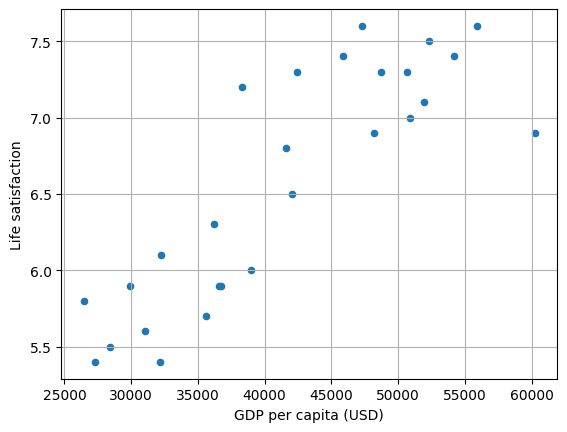

In [17]:
country_stats.plot(kind='scatter',grid=True,x=gdppc_col,y=lifesat_col)
plt.show()

In [18]:
from sklearn import linear_model

X_sample = country_stats[["GDP per capita (USD)"]].to_numpy()
y_sample = country_stats[["Life satisfaction"]].to_numpy()

lin1 = linear_model.LinearRegression()
lin1.fit(X_sample, y_sample)

t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=3.75, θ1=6.78e-05


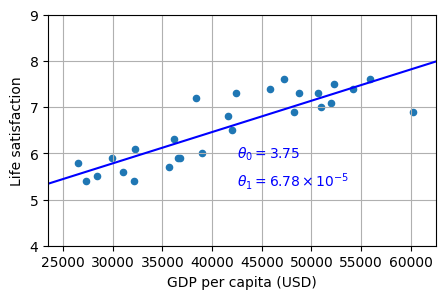

In [19]:
min_life_sat = 4
max_life_sat = 9
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(max_gdp - 20_000, min_life_sat + 1.9,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(max_gdp - 20_000, min_life_sat + 1.3,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])


plt.show()

In [27]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]
missing_data

,Country,Life satisfaction,GDP per capita (USD)
3,Brazil,6.4,14063.982505
5,Chile,6.5,23324.524751
6,Colombia,6.3,13441.492952
15,Ireland,7.0,89688.956958
20,Luxembourg,6.9,110261.157353
21,Mexico,6.5,17887.750736
24,Norway,7.6,63585.903514
29,South Africa,4.7,11466.189672
32,Switzerland,7.5,68393.306004


In [21]:
gdp_year = 2020
gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)
cyprus_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Cyprus"]
cyprus_gdp_per_capita

np.float64(37655.1803457421)

In [22]:
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0, 0]
cyprus_predicted_life_satisfaction

np.float64(6.301656332738058)

In [23]:
cyprus_gdp_per_capita_2020=(
    gdp_per_capita_2020[gdp_per_capita_2020["Entity"]=="Cyprus"][[gdppc_col]]
)
cyprus_gdp_per_capita_2020

,GDP per capita (USD)
1517,37655.180346


In [24]:
#model=lin1
cyprus_predicted_life_satisfaction=lin1.predict(cyprus_gdp_per_capita_2020)
cyprus_predicted_life_satisfaction

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[6.30165633]])

In [26]:
#X,y=X_sample,y_sample
from sklearn.neighbors import KNeighborsRegressor
model_knn=KNeighborsRegressor(n_neighbors=3)
model_knn.fit(X_sample,y_sample)

model_knn.predict(cyprus_gdp_per_capita_2020)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


array([[6.33333333]])